# MILESTONE 1: DATA SANITY

IMPORTS

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV

1. Use the PRS dataset to create a dataframe

In [2]:
# Reading the PRS data using pandas
df = pd.read_csv('Final.csv')

In [3]:
df

CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                        0,00                1000          3220   
1                        0,00                1000          3220   
2                    82342,02                I200          3260   
3                     1471,24                N000          3290   
4                        0,00                N000          3290   
...                       ...                 ...           ...   
1101920                  0,00                 NaN          4260   
1101921                  0,00                 NaN          4260   
1101922                  0,00                 NaN          4260   
1101923                  0,00                 NaN          4260   
1101924                  0,00                 NaN          4260   

         ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA  \
0                   20220101                43012                SR02   
1                   20220101                43114                NR03   
2                   20220101               110019                NR01   
3                   20220101               153013                SR02   
4                   20220101               160020                SR01   
...                      ...                  ...                 ...   
1101920             20220601                74357                NR02   
1101921             20220601                84052                NR04   
1101922             20220601                85322                NR01   
1101923             20220601                90538                SR04   
1101924             20220601               113357                NR02   

         SOLD_TO_PARTY ORDER_AMOUNT  REQUESTED_DELIVERY_DATE ORDER_CURRENCY  \
0            756141537       954,61                 20220113            EUR   
1            798847812       787,36                 20220111            EUR   
2            960984659     67493,46                 20220112            EUR   
3            925857642      1405,54                 20220106            EUR   
4            947942786         0,00                 20220106            EUR   
...                ...          ...                      ...            ...   
1101920      946056501      4415,19                 20220601            SGD   
1101921      894775488         0,00                 20220601            SGD   
1101922      909729781         0,00                 20220601            SGD   
1101923      940836817         0,00                 20220601            SGD   
1101924      754385277      4415,19                 20220601            SGD   

         CREDIT_STATUS  CUSTOMER_NUMBER  
0                  NaN         12311807  
1                  NaN         12311807  
2                 93.0         12118758  
3                 93.0       1210499770  
4                 64.0       1210351400  
...                ...              ...  
1101920            NaN       1210331804  
1101921            NaN       1210331804  
1101922            NaN     

2. Check the description of the dataframe

In [4]:
df.describe()

CUSTOMER_ORDER_ID     SALES_ORG  COMPANY_CODE  ORDER_CREATION_DATE  \
count       1.101925e+06  1.101925e+06  1.101925e+06         1.101925e+06   
mean        8.763187e+08  3.304891e+03  3.431364e+03         2.022032e+07   
std         7.088594e+07  6.958920e+02  5.483805e+02         1.426756e+02   
min         7.534520e+08  2.100000e+03  5.900000e+01         2.022010e+07   
25%         8.149522e+08  2.702000e+03  3.260000e+03         2.022021e+07   
50%         8.763963e+08  3.305000e+03  3.660000e+03         2.022032e+07   
75%         9.376832e+08  3.908000e+03  3.670000e+03         2.022042e+07   
max         9.990063e+08  4.510000e+03  4.260000e+03         2.022060e+07   

       ORDER_CREATION_TIME  SOLD_TO_PARTY  REQUESTED_DELIVERY_DATE  \
count         1.101925e+06   1.101925e+06             1.101925e+06   
mean          1.340316e+05   8.763265e+08             2.022035e+07   
std           6.503618e+04   7.090306e+07             1.751912e+03   
min           0.000000e+00   7.534518e+08             2.019081e+07   
25%           8.170200e+04   8.148366e+08             2.022022e+07   
50%           1.509540e+05   8.763542e+08             2.022033e+07   
75%           1.853580e+05   9.377293e+08             2.022050e+07   
max           2.359590e+05   9.990075e+08             2.202022e+07   

       CREDIT_STATUS  CUSTOMER_NUMBER  
count  219478.000000     1.101925e+06  
mean       74.464771     1.074092e+09  
std        14.444210     4.042693e+08  
min        52.000000     1.210001e+07  
25%        64.000000     1.230006e+09  
50%        64.000000     1.230014e+09  
75%        93.000000     1.230014e+09  
max        93.000000     1.230025e+09

3. Check the shape of the dataframe

In [5]:
df.shape

(1101925, 16)

4. Check the data frame informations

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

5. Check for the Null values in the dataframe

In [7]:
df.isnull()

CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION  \
0                    False      False                 False     False   
1                    False      False                 False     False   
2                    False      False                 False     False   
3                    False      False                 False     False   
4                    False      False                 False     False   
...                    ...        ...                   ...       ...   
1101920              False      False                 False     False   
1101921              False      False                 False     False   
1101922              False      False                 False     False   
1101923              False      False                 False     False   
1101924              False      False                 False     False   

         RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                        False                False         False   
1                        False                False         False   
2                        False                False         False   
3                        False                False         False   
4                        False                False         False   
...                        ...                  ...           ...   
1101920                  False                 True         False   
1101921                  False                 True         False   
1101922                  False                 True         False   
1101923                  False                 True         False   
1101924                  False                 True         False   

         ORDER_CREATION_DATE  ORDER_CREATION_TIME  CREDIT_CONTROL_AREA  \
0                      False                False                False   
1                      False                False                False   
2                      False                False                False   
3                      False                False                False   
4                      False                False                False   
...                      ...                  ...                  ...   
1101920                False                False                False   
1101921                False                False                False   
1101922                False                False                False   
1101923                False                False                False   
1101924                False                False                False   

         SOLD_TO_PARTY  ORDER_AMOUNT  REQUESTED_DELIVERY_DATE  ORDER_CURRENCY  \
0                False         False                    False           False   
1                False         False                    False           False   
2                False         False                    False           False   
3                False         False                    False           False   
4                False         False                    False           False   
...                ...           ...                      ...             ...   
1101920          False         False                    False           False   
1101921          False         False                    False           False   
1101922          False         False                    False           False   
1101923          False         False                    False           False   
1101924          False         False                    False           False   

         CREDIT_STATUS  CUSTOMER_NUMBER  
0                 True            False  
1                 True            False  
2                False            False  
3                False            False  
4                False            False  
...                ...              ...  
1101920           True            False  
1101921           True            False  
1101922           True            False  
1101923           Tru

In [8]:
null_values = df.isnull().sum()
print(null_values)

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64


6. Replace all the null values with "NaN"

In [9]:
df_filled = df.fillna("NaN")

In [10]:
df_filled

CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                        0,00                1000          3220   
1                        0,00                1000          3220   
2                    82342,02                I200          3260   
3                     1471,24                N000          3290   
4                        0,00                N000          3290   
...                       ...                 ...           ...   
1101920                  0,00                 NaN          4260   
1101921                  0,00                 NaN          4260   
1101922                  0,00                 NaN          4260   
1101923                  0,00                 NaN          4260   
1101924                  0,00                 NaN          4260   

         ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA  \
0                   20220101                43012                SR02   
1                   20220101                43114                NR03   
2                   20220101               110019                NR01   
3                   20220101               153013                SR02   
4                   20220101               160020                SR01   
...                      ...                  ...                 ...   
1101920             20220601                74357                NR02   
1101921             20220601                84052                NR04   
1101922             20220601                85322                NR01   
1101923             20220601                90538                SR04   
1101924             20220601               113357                NR02   

         SOLD_TO_PARTY ORDER_AMOUNT  REQUESTED_DELIVERY_DATE ORDER_CURRENCY  \
0            756141537       954,61                 20220113            EUR   
1            798847812       787,36                 20220111            EUR   
2            960984659     67493,46                 20220112            EUR   
3            925857642      1405,54                 20220106            EUR   
4            947942786         0,00                 20220106            EUR   
...                ...          ...                      ...            ...   
1101920      946056501      4415,19                 20220601            SGD   
1101921      894775488         0,00                 20220601            SGD   
1101922      909729781         0,00                 20220601            SGD   
1101923      940836817         0,00                 20220601            SGD   
1101924      754385277      4415,19                 20220601            SGD   

        CREDIT_STATUS  CUSTOMER_NUMBER  
0                 NaN         12311807  
1                 NaN         12311807  
2                93.0         12118758  
3                93.0       1210499770  
4                64.0       1210351400  
...               ...              ...  
1101920           NaN       1210331804  
1101921           NaN       1210331804  
1101922           NaN       12103318

7. Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"

In [11]:
df['ORDER_CREATION_DATE']

0          20220101
1          20220101
2          20220101
3          20220101
4          20220101
             ...   
1101920    20220601
1101921    20220601
1101922    20220601
1101923    20220601
1101924    20220601
Name: ORDER_CREATION_DATE, Length: 1101925, dtype: int64

In [12]:
# This code converts the 'ORDER_CREATION_DATE' column in the DataFrame 'df' from a int format to a datetime format using the pandas library.
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format = "%Y%m%d")

In [13]:
df['ORDER_CREATION_DATE']

0         2022-01-01
1         2022-01-01
2         2022-01-01
3         2022-01-01
4         2022-01-01
             ...    
1101920   2022-06-01
1101921   2022-06-01
1101922   2022-06-01
1101923   2022-06-01
1101924   2022-06-01
Name: ORDER_CREATION_DATE, Length: 1101925, dtype: datetime64[ns]

8. Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"

In [14]:
# This code converts the 'REQUESTED_DELIVERY_DATE' column in the DataFrame 'df' from a int format to a datetime format using the pandas library.
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format = "%Y%m%d")

In [15]:
df['REQUESTED_DELIVERY_DATE']

0         2022-01-13
1         2022-01-11
2         2022-01-12
3         2022-01-06
4         2022-01-06
             ...    
1101920   2022-06-01
1101921   2022-06-01
1101922   2022-06-01
1101923   2022-06-01
1101924   2022-06-01
Name: REQUESTED_DELIVERY_DATE, Length: 1101925, dtype: datetime64[ns]

9. Sanity check - Check how many records are having order date greater than the delivery date

In [16]:
df_sanity_check = df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']]

In [17]:
df_sanity_check

CUSTOMER_ORDER_ID  SALES_ORG  \
6                756619705       4269   
366              824655599       4346   
583              911886357       4078   
585              970279857       2868   
588              868088697       3564   
...                    ...        ...   
1101750          832828339       4390   
1101751          857097217       3216   
1101781          834722188       3797   
1101783          905569544       4391   
1101823          924902245       2640   

                                 DISTRIBUTION_CHANNEL      DIVISION  \
6                                             Bahrain  North-Region   
366                                        Azerbaijan  North-Region   
583                                           Mayotte  North-Region   
585                                            Taiwan  North-Region   
588                                       New Zealand  North-Region   
...                                               ...           ...   
1101750                                     Greenland  North-Region   
1101751  Antarctica (the territory South of 60 deg S)  North-Region   
1101781                                       Albania  North-Region   
1101783                                     Nicaragua  North-Region   
1101823                                          Togo  North-Region   

        RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
6                     1974,66                9999            59   
366                     88,24                9999            59   
583                   2112,64                9999            59   
585                   1697,55                9999            59   
588                   4734,95                9999            59   
...                       ...                 ...           ...   
1101750                  0,00                9999          3000   
1101751                  0,00                9999          3000   
1101781                  0,00                9999          3000   
1101783                  0,00                9999          3000   
1101823                363,01                9999          3000   

        ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA  \
6                2022-01-02                73006                NR03   
366              2022-01-03                83005                NR02   
583              2022-01-03               113004                NR03   
585              2022-01-03               113212                SR04   
588              2022-01-03               113255                NR01   
...                     ...                  ...                 ...   
1101750          2022-06-01                53614                NR01   
1101751          2022-06-01                53640                NR04   
1101781          2022-06-01                60014                SR03   
1101783          2022-06-01                60129                SR01   
1101823          2022-06-01                75839                SR01   

         SOLD_TO_PARTY ORDER_AMOUNT REQUESTED_DELIVERY_DATE ORDER_CURRENCY  \
6            795887697         0,00              2021-12-31            RON   
366          976505690         0,00              2021-12-29            RON   
583          906169691         0,00              2021-12-31            RON   
585          954171827         0,00              2021-12-31            RON   
588          866142380         0,00              2021-12-31            RON   
...                ...          ...                     ...            ...   
1101750      897942526       645,18              2022-05-31            AUD   
1101751      917261980      1495,71              2022-05-31            AUD   
1101781      773583018      2014,44              2022-05-31            AUD   
1101783      879740718       816,96              2022-05-31            AUD   
1101823      895119746       635,68              2022-05-31            AUD   

         CREDIT_STATUS  CUSTOMER_NUMBER  
6             

In [18]:
len(df_sanity_check)

27142

10. Remove those records where order date is greater than the delivery date 

In [19]:
# Here we just find all the 'ORDER_CREATION_DATE' that is less than or equal to 'REQUESTED_DELIVERY_DATE' and then assign it to the dataframe df. It will remove the records where order date is greater than the delivery date
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]

In [20]:
df

CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                        0,00                1000          3220   
1                        0,00                1000          3220   
2                    82342,02                I200          3260   
3                     1471,24                N000          3290   
4                        0,00                N000          3290   
...                       ...                 ...           ...   
1101920                  0,00                 NaN          4260   
1101921                  0,00                 NaN          4260   
1101922                  0,00                 NaN          4260   
1101923                  0,00                 NaN          4260   
1101924                  0,00                 NaN          4260   

        ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA  \
0                2022-01-01                43012                SR02   
1                2022-01-01                43114                NR03   
2                2022-01-01               110019                NR01   
3                2022-01-01               153013                SR02   
4                2022-01-01               160020                SR01   
...                     ...                  ...                 ...   
1101920          2022-06-01                74357                NR02   
1101921          2022-06-01                84052                NR04   
1101922          2022-06-01                85322                NR01   
1101923          2022-06-01                90538                SR04   
1101924          2022-06-01               113357                NR02   

         SOLD_TO_PARTY ORDER_AMOUNT REQUESTED_DELIVERY_DATE ORDER_CURRENCY  \
0            756141537       954,61              2022-01-13            EUR   
1            798847812       787,36              2022-01-11            EUR   
2            960984659     67493,46              2022-01-12            EUR   
3            925857642      1405,54              2022-01-06            EUR   
4            947942786         0,00              2022-01-06            EUR   
...                ...          ...                     ...            ...   
1101920      946056501      4415,19              2022-06-01            SGD   
1101921      894775488         0,00              2022-06-01            SGD   
1101922      909729781         0,00              2022-06-01            SGD   
1101923      940836817         0,00              2022-06-01            SGD   
1101924      754385277      4415,19              2022-06-01            SGD   

         CREDIT_STATUS  CUSTOMER_NUMBER  
0                  NaN         12311807  
1                  NaN         12311807  
2                 93.0         12118758  
3                 93.0       1210499770  
4                 64.0       1210351400  
...                ...              ...  
1101920            NaN       1210331804  
1101921            NaN       1210331804  
1101922            NaN       1210331811  
1101923  

11. Check the number of records where the “ORDER_AMOUNT” field is having “-” in it.

In [21]:
order_amount_with_dash = df[df['ORDER_AMOUNT'].str.contains('-')]

In [22]:
len(order_amount_with_dash)

32

12. Replace “-” with “” from the “ORDER_AMOUNT” field. 

In [23]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace("-","")

13. Check the number of records where the “ORDER_AMOUNT” field is having “,” in it..

In [24]:
order_amount_with_comma = df[df['ORDER_AMOUNT'].str.contains(',')]

In [25]:
order_amount_with_comma

CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                        0,00                1000          3220   
1                        0,00                1000          3220   
2                    82342,02                I200          3260   
3                     1471,24                N000          3290   
4                        0,00                N000          3290   
...                       ...                 ...           ...   
1101920                  0,00                 NaN          4260   
1101921                  0,00                 NaN          4260   
1101922                  0,00                 NaN          4260   
1101923                  0,00                 NaN          4260   
1101924                  0,00                 NaN          4260   

        ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA  \
0                2022-01-01                43012                SR02   
1                2022-01-01                43114                NR03   
2                2022-01-01               110019                NR01   
3                2022-01-01               153013                SR02   
4                2022-01-01               160020                SR01   
...                     ...                  ...                 ...   
1101920          2022-06-01                74357                NR02   
1101921          2022-06-01                84052                NR04   
1101922          2022-06-01                85322                NR01   
1101923          2022-06-01                90538                SR04   
1101924          2022-06-01               113357                NR02   

         SOLD_TO_PARTY ORDER_AMOUNT REQUESTED_DELIVERY_DATE ORDER_CURRENCY  \
0            756141537       954,61              2022-01-13            EUR   
1            798847812       787,36              2022-01-11            EUR   
2            960984659     67493,46              2022-01-12            EUR   
3            925857642      1405,54              2022-01-06            EUR   
4            947942786         0,00              2022-01-06            EUR   
...                ...          ...                     ...            ...   
1101920      946056501      4415,19              2022-06-01            SGD   
1101921      894775488         0,00              2022-06-01            SGD   
1101922      909729781         0,00              2022-06-01            SGD   
1101923      940836817         0,00              2022-06-01            SGD   
1101924      754385277      4415,19              2022-06-01            SGD   

         CREDIT_STATUS  CUSTOMER_NUMBER  
0                  NaN         12311807  
1                  NaN         12311807  
2                 93.0         12118758  
3                 93.0       1210499770  
4                 64.0       1210351400  
...                ...              ...  
1101920            NaN       1210331804  
1101921            NaN       1210331804  
1101922            NaN       1210331811  
1101923  

In [26]:
print(len(order_amount_with_comma))

1073406


14. Replace “,” with “.” from the “ORDER_AMOUNT” field.

In [27]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(',','.')

15. Count the number of records where the order date and the delivery date are same

In [28]:
df_order_delivery_same_date = df[df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']]

In [29]:
df_order_delivery_same_date

CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
70               919632251       2710                   Burundi  South-Region   
71               795398490       2321                   Bolivia  South-Region   
72               871157328       3386                Montserrat  South-Region   
73               933132818       3377                 Gibraltar  North-Region   
74               862209197       3029  Central African Republic  North-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
70                       0,00                 NaN           271   
71                       0,00                 NaN           271   
72                       0,00                 NaN           271   
73                       0,00                S000          3390   
74                       0,00                 NaN          3220   
...                       ...                 ...           ...   
1101920                  0,00                 NaN          4260   
1101921                  0,00                 NaN          4260   
1101922                  0,00                 NaN          4260   
1101923                  0,00                 NaN          4260   
1101924                  0,00                 NaN          4260   

        ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA  \
70               2022-01-03                64511                SR03   
71               2022-01-03                71750                SR01   
72               2022-01-03                74332                SR01   
73               2022-01-03               220023                NR03   
74               2022-01-03                82428                NR04   
...                     ...                  ...                 ...   
1101920          2022-06-01                74357                NR02   
1101921          2022-06-01                84052                NR04   
1101922          2022-06-01                85322                NR01   
1101923          2022-06-01                90538                SR04   
1101924          2022-06-01               113357                NR02   

         SOLD_TO_PARTY ORDER_AMOUNT REQUESTED_DELIVERY_DATE ORDER_CURRENCY  \
70           828441320     46005.23              2022-01-03            AED   
71           890801004     35009.98              2022-01-03            AED   
72           776045549     31114.49              2022-01-03            AED   
73           924614219     10813.28              2022-01-03            CHF   
74           990149098        12.16              2022-01-03            EUR   
...                ...          ...                     ...            ...   
1101920      946056501      4415.19              2022-06-01            SGD   
1101921      894775488         0.00              2022-06-01            SGD   
1101922      909729781         0.00              2022-06-01            SGD   
1101923      940836817         0.00              2022-06-01            SGD   
1101924      754385277      4415.19              2022-06-01            SGD   

         CREDIT_STATUS  CUSTOMER_NUMBER  
70                 NaN       1210433463  
71                 NaN       1210433463  
72                 NaN       1210433463  
73                 NaN       1230006503  
74                 NaN       1230022753  
...                ...              ...  
1101920            NaN       1210331804  
1101921            NaN       1210331804  
1101922            NaN       1210331811  
1101923  

In [30]:
len(df_order_delivery_same_date)

100437

16. Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”

In [31]:
currency_counts = df['ORDER_CURRENCY'].value_counts()

In [32]:
currency_counts

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

17. Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column. 

In [33]:
# Here I create a dictionary named 'exchange_curr' and map it to exchange the non-USD currency to USD by multiplying 'ORDER_AMOUNT' and assign it to a new column named 'amount_in_usd' in the dataframe

exchange_curr = {
    'USD':1,                                                     
    'EUR': 1.07,   
    'AUD': 0.65,    
    'CAD': 0.74,    
    'GBP': 1.24,    
    'MYR': 0.22,    
    'PLN': 0.24,    
    'AED': 0.27,   
    'HKD': 0.13,     
    'CHF': 1.10,     
    'RON': 0.22,     
    'SGD': 0.74,     
    'CZK': 0.045,     
    'HU1': 0.0029, # it is HUF  
    'NZD': 0.61,       
    'BHD': 2.65,      
    'SAR': 0.27,       
    'QAR': 0.27,       
    'KWD': 3.25,       
    'SEK': 0.093
}
df['amount_in_usd'] = df['ORDER_AMOUNT'].astype(float) * df['ORDER_CURRENCY'].map(exchange_curr)

In [34]:
df['amount_in_usd']

0           1021.4327
1            842.4752
2          72218.0022
3           1503.9278
4              0.0000
              ...    
1101920     3267.2406
1101921        0.0000
1101922        0.0000
1101923        0.0000
1101924     3267.2406
Name: amount_in_usd, Length: 1074783, dtype: float64

18. Check for values “0” in the “amount_in_usd” column. 

In [35]:
# Here since the 'amount_in_usd' values are in floating point numbers so I have find the numbers that are less than 0.000000001 which will eventually be 0
no_of_zeroes = df[df['amount_in_usd'] < 0.000000001]
no_of_zeroes

CUSTOMER_ORDER_ID  SALES_ORG DISTRIBUTION_CHANNEL      DIVISION  \
4                930253442       2381               Greece  South-Region   
57               778638920       2373             Thailand  South-Region   
62               870847173       4352               Poland  North-Region   
67               822817658       2491          Netherlands  North-Region   
117              799548044       2849              Belgium  South-Region   
...                    ...        ...                  ...           ...   
1101891          835314074       3410               Taiwan  South-Region   
1101892          958175613       4452           Mauritania  South-Region   
1101921          998890898       4509              Armenia  South-Region   
1101922          983330221       3951                Nepal  South-Region   
1101923          926668029       3235               Panama  South-Region   

        RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
4                        0,00                N000          3290   
57                       0,00                DFUE          3350   
62                       0,00                DFUE          3350   
67                       0,00                DFUE          3350   
117                      0,00                1000          3220   
...                       ...                 ...           ...   
1101891                  0,00                T001          4260   
1101892                  0,00                T001          4260   
1101921                  0,00                 NaN          4260   
1101922                  0,00                 NaN          4260   
1101923                  0,00                 NaN          4260   

        ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA  \
4                2022-01-01               160020                SR01   
57               2022-01-01                60015                NR01   
62               2022-01-01                60021                NR02   
67               2022-01-01                60020                SR01   
117              2022-01-03                 3143                NR01   
...                     ...                  ...                 ...   
1101891          2022-06-01               144135                NR04   
1101892          2022-06-01               144527                NR01   
1101921          2022-06-01                84052                NR04   
1101922          2022-06-01                85322                NR01   
1101923          2022-06-01                90538                SR04   

         SOLD_TO_PARTY ORDER_AMOUNT REQUESTED_DELIVERY_DATE ORDER_CURRENCY  \
4            947942786         0.00              2022-01-06            EUR   
57           815559921         0.00              2022-01-03            EUR   
62           966162539         0.00              2022-01-03            EUR   
67           754485523         0.00              2022-01-03            EUR   
117          887878556         0.00              2022-03-31            EUR   
...                ...          ...                     ...            ...   
1101891      976168967         0.00              2022-07-25            USD   
1101892      851834280         0.00              2022-07-25            USD   
1101921      894775488         0.00              2022-06-01            SGD   
1101922      909729781         0.00              2022-06-01            SGD   
1101923      940836817         0.00              2022-06-01            SGD   

         CREDIT_STATUS  CUSTOMER_NUMBER  amount_in_usd  
4                 64.0       1210351400            0.0  
57                 NaN       1230010772            0.0  
62                 NaN         12300106            0.0  
67                 NaN         12300106            0.0  
117                NaN       1230023217            0.0  
...                ...              ...            ...  
1101891            NaN         12137245            0.0  
1101892            NaN         12

In [36]:
print(len(no_of_zeroes))

237821


19. Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'

In [37]:
# Here I convert the CUSTOMER_NUMBER and 'COMPANY_CODE' to string type and concatenate both the column and assign it to a new column named 'unique_cust_id'.
df['unique_cust_id'] = df['CUSTOMER_NUMBER'].astype(str) + df['COMPANY_CODE'].astype(str)

In [38]:
df['unique_cust_id']

0            123118073220
1            123118073220
2            121187583260
3          12104997703290
4          12103514003290
                ...      
1101920    12103318044260
1101921    12103318044260
1101922    12103318114260
1101923    12103318114260
1101924    12103318044260
Name: unique_cust_id, Length: 1074783, dtype: object

# MILESTONE 2: EDA

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Create a Histogram on DISTRIBUTION_CHANNEL

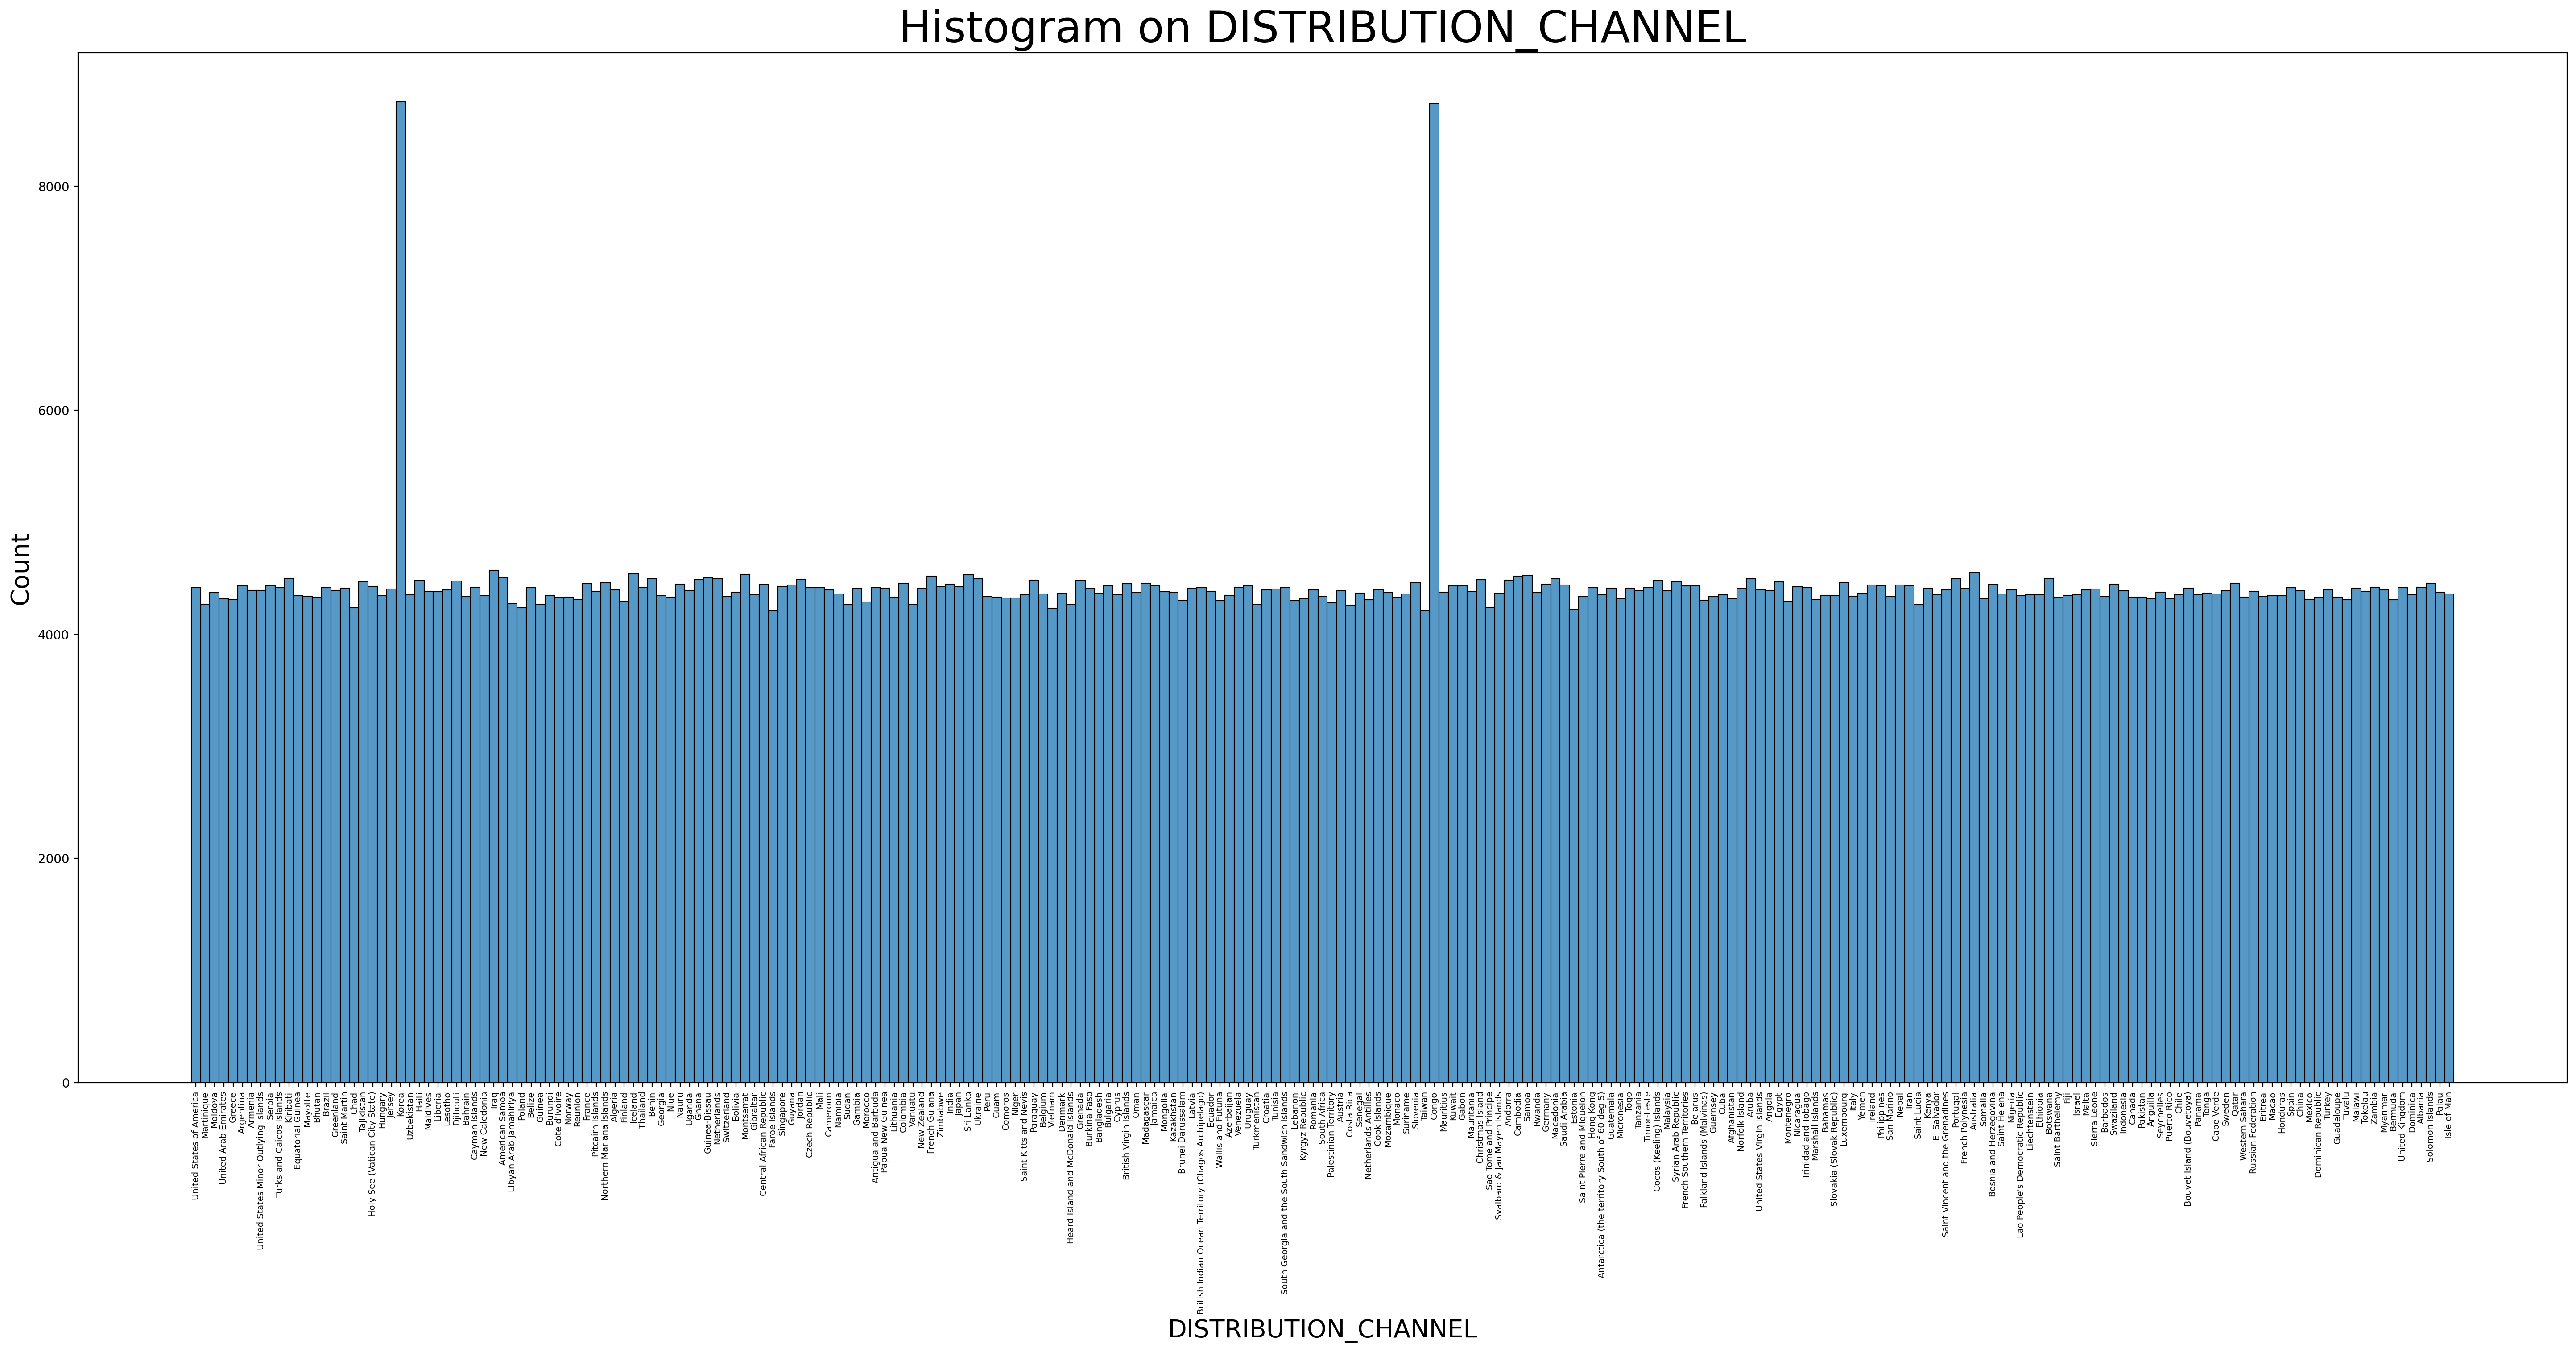

In [40]:
# Creating a Histogram on DISTRIBUTION_CHANNEL using 350 bins which will help to visualize the histogram better. 
fig = plt.figure(figsize=(36,15), dpi=200)
sns.histplot(x='DISTRIBUTION_CHANNEL', data=df, bins=350, binwidth=50)
plt.xticks(rotation=90, fontsize=7)
plt.title("Histogram on DISTRIBUTION_CHANNEL",fontsize=35)
plt.xlabel("DISTRIBUTION_CHANNEL",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

2. Create a Pie Chart on ORDER_CURRENCY

In [41]:
# Here I am taking all the values which are less than 50000 as 'others' so that pie-chart is not getting congested and visualization is simple.
order_curr_pie = df['ORDER_CURRENCY'].value_counts()
temp = order_curr_pie < 50000
others = order_curr_pie[temp].sum()
order_curr_pie = order_curr_pie[~temp]
order_curr_pie['Others'] = others

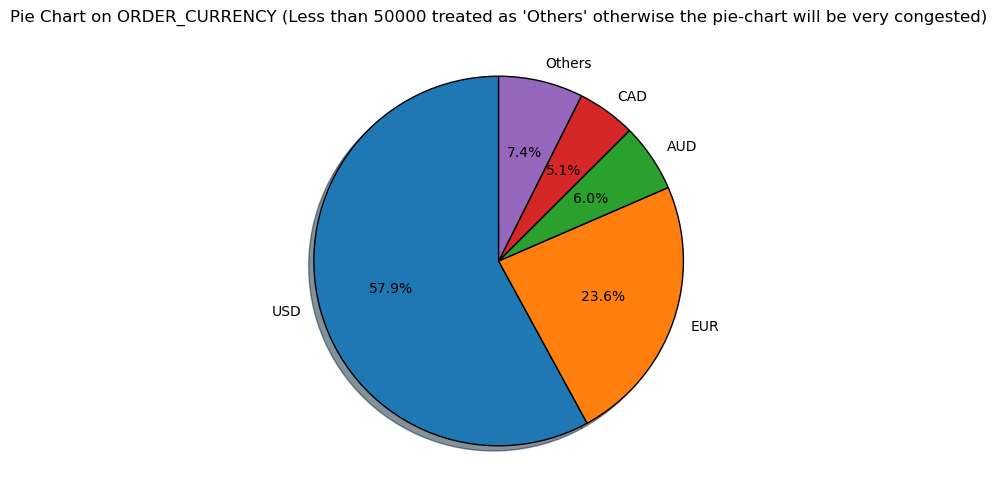

In [42]:
plt.figure(figsize=(13,6))
plt.pie(order_curr_pie, labels=order_curr_pie.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'},shadow=True)
plt.title("Pie Chart on ORDER_CURRENCY (Less than 50000 treated as 'Others' otherwise the pie-chart will be very congested)")
plt.show()

3. Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

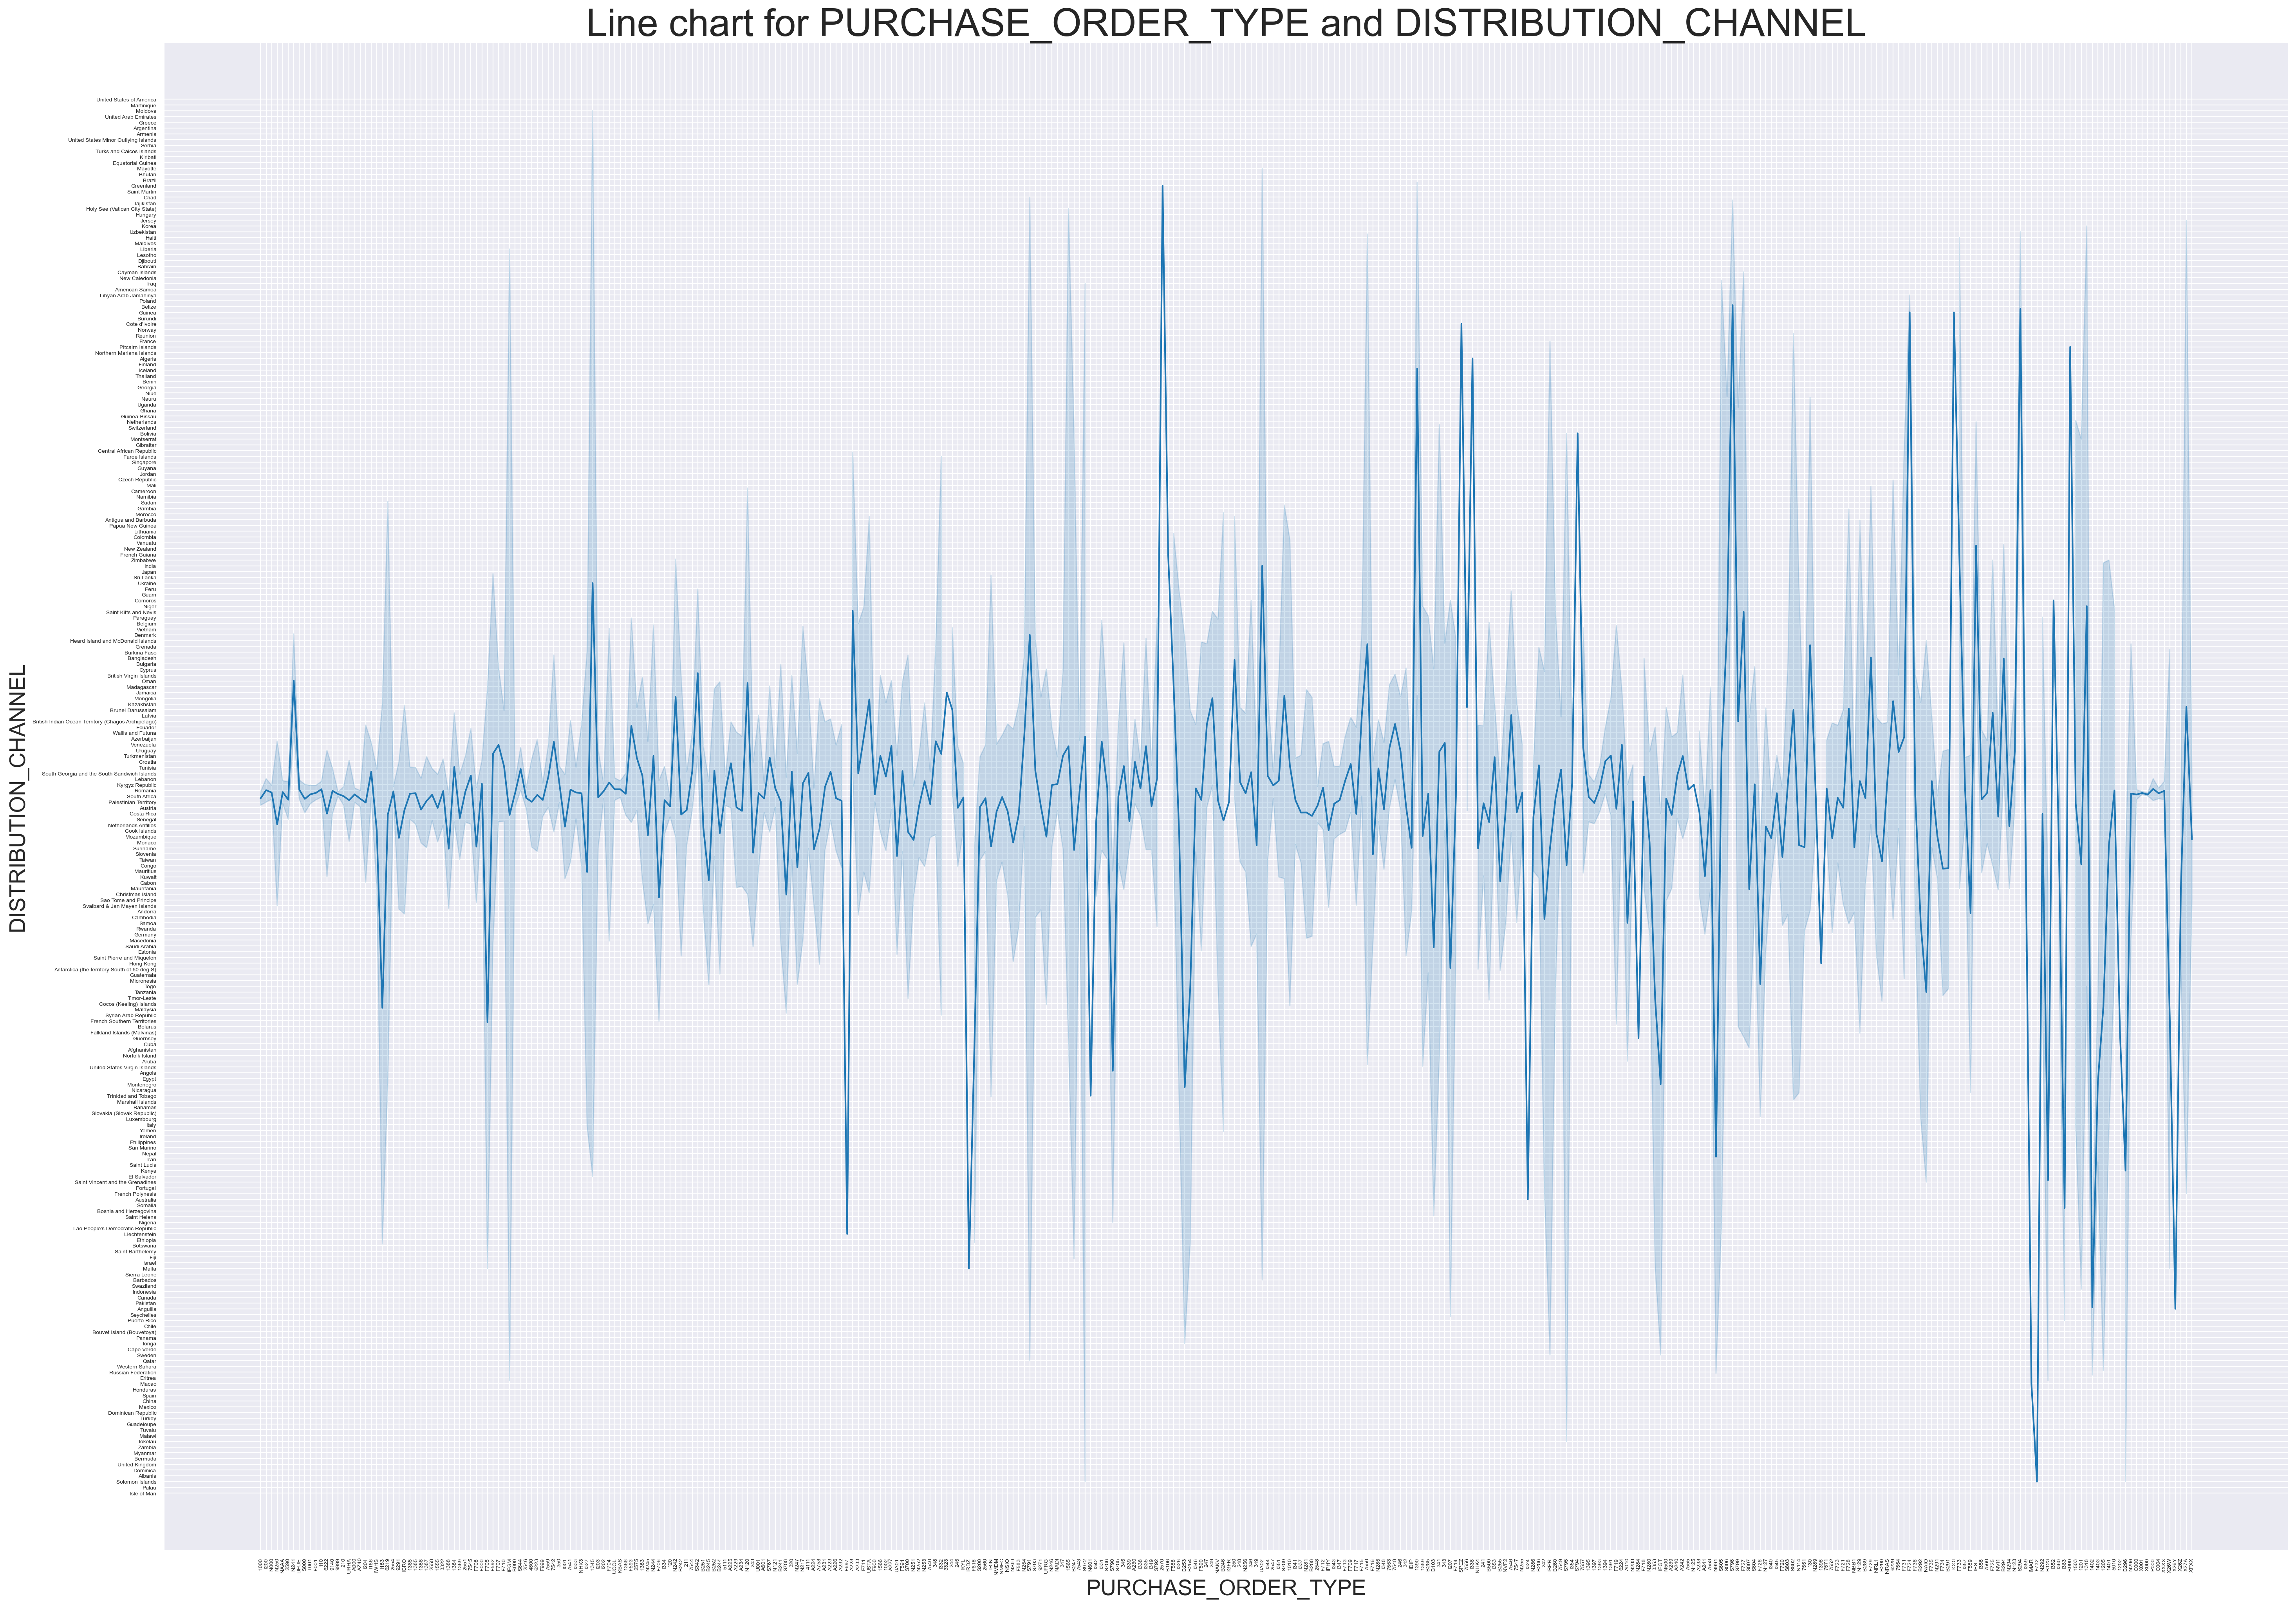

In [43]:
# ZOOM-IN the graph for better visualization. Since we have very large datasets so, I made the figure size bigger.
fig = plt.figure(figsize=(35,25),dpi=200)
sns.set_style('darkgrid')
sns.lineplot(x='PURCHASE_ORDER_TYPE',y='DISTRIBUTION_CHANNEL',data=df)
plt.xticks(rotation=90,fontsize=5)
plt.yticks(rotation=0,fontsize=5)
plt.xlabel('PURCHASE_ORDER_TYPE',fontsize=20)
plt.ylabel('DISTRIBUTION_CHANNEL',fontsize=20)
plt.title('Line chart for PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL',fontsize=35)
plt.show()

4. Create a line plot on ORDER_CREATION_DATE and amount_in_usd

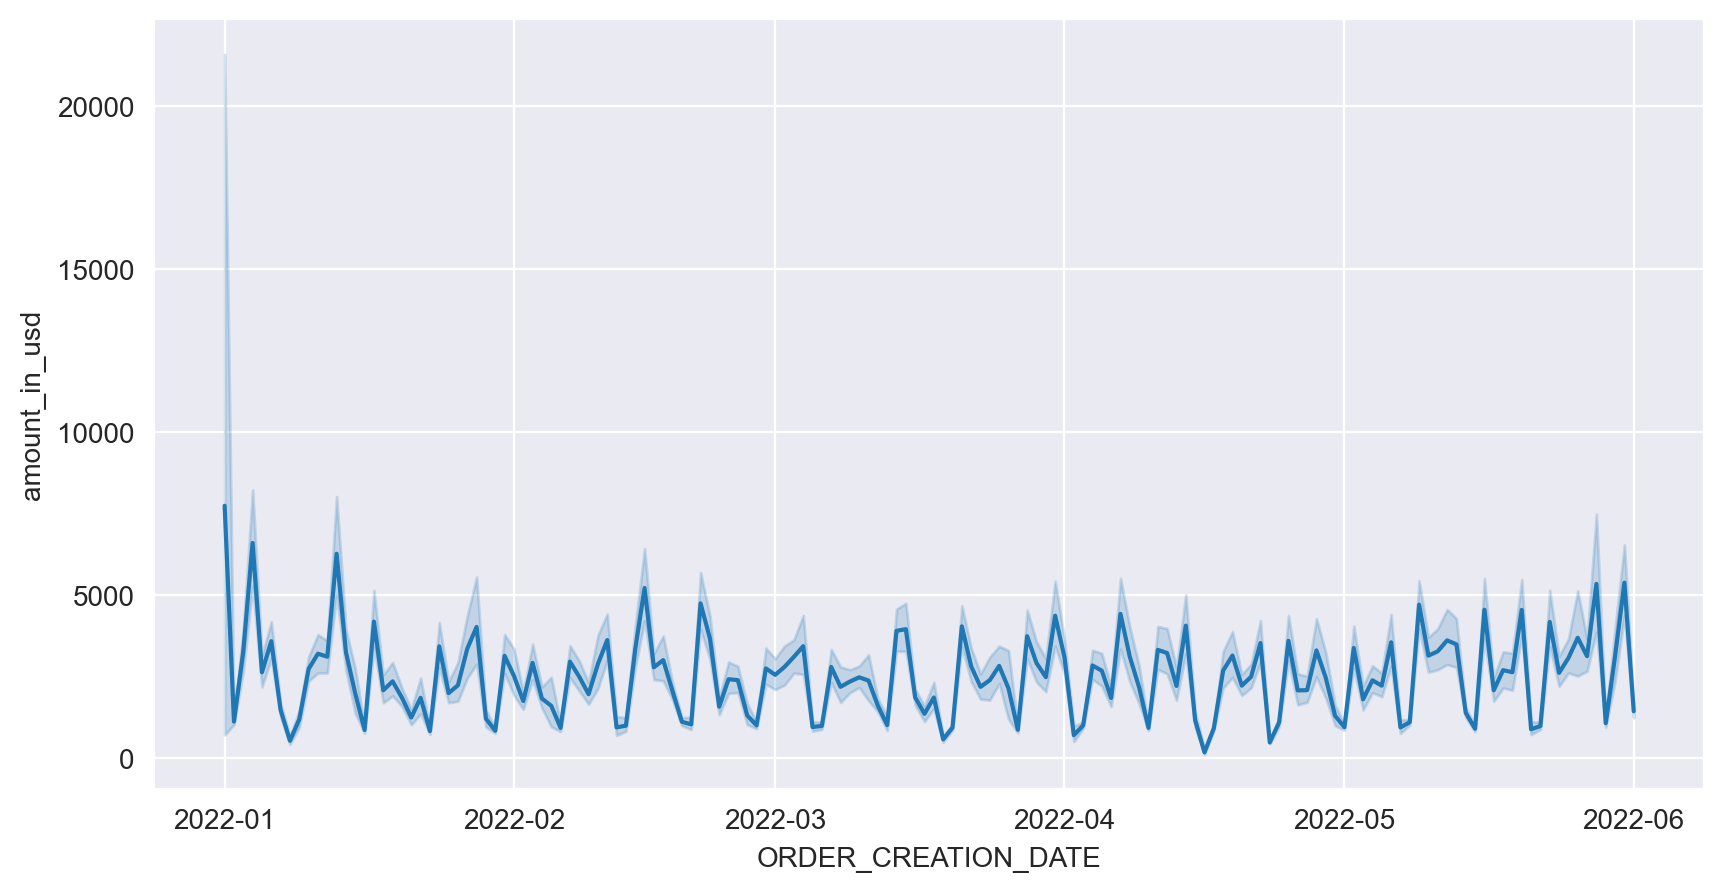

In [44]:
fig = plt.figure(figsize=(10,5),dpi=200)
sns.lineplot(x='ORDER_CREATION_DATE', y='amount_in_usd', data=df)
plt.show()

5. Create a boxplot on ORDER_AMOUNT to find out the outliers

In [45]:
# First we have to convert ORDER_AMOUNT to float type datatype. Then plotting the boxplot.
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].astype(float)

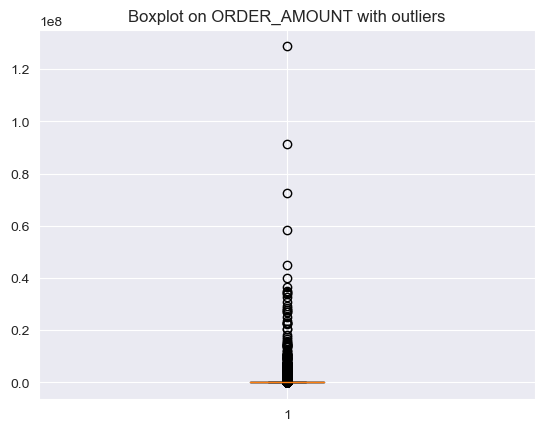

In [46]:
plt.boxplot(data=df, x='ORDER_AMOUNT')
plt.title("Boxplot on ORDER_AMOUNT with outliers")
plt.show()

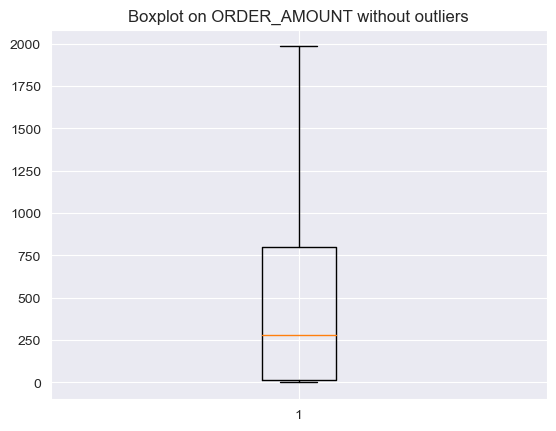

In [47]:
# Creating a Boxplot on ORDER_AMOUNT without Outliers
plt.boxplot(data=df,x='ORDER_AMOUNT', showfliers=False)
plt.title("Boxplot on ORDER_AMOUNT without outliers")
plt.show()

6. Create a barchart on COMPANY_CODE and ORDER_AMOUNT

In [48]:
df = df.sort_values(by=['ORDER_AMOUNT'], ascending=False)

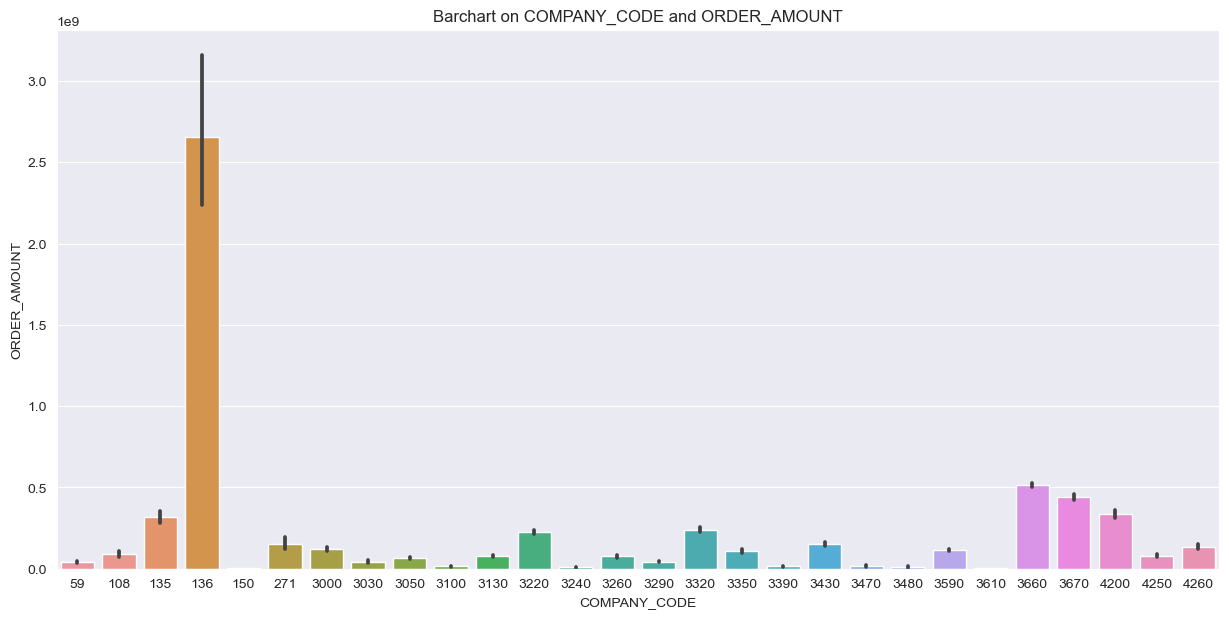

In [49]:
# Here I am plotting the barplot using estimator=np.sum because i want to find the total ORDER_AMOUNT for a specific COMPANY_CODE
fig=plt.figure(figsize=(15,7))
sns.barplot(x=df['COMPANY_CODE'], y=df['ORDER_AMOUNT'], data=df,estimator=np.sum)
plt.title("Barchart on COMPANY_CODE and ORDER_AMOUNT")
plt.show()

# Milestone 3: Feature Engineering and Selection

1. Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.

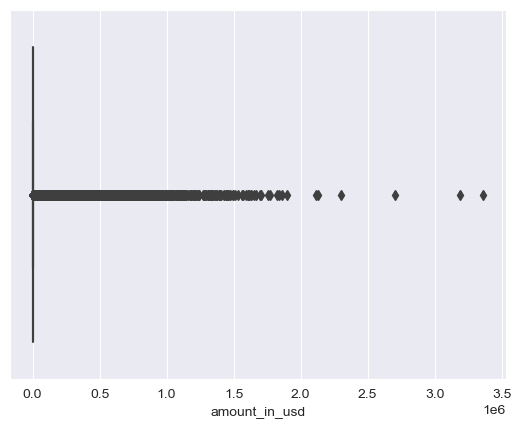

In [50]:
# Checking Outliers in 'amount_in_usd' column using boxplot. 
sns.boxplot(x='amount_in_usd',data=df)
plt.show()

In [51]:
# First extract the column values as a numpy array so that we can use it for finding percentiles to find the IQR. Then we can find the upper limit and lower limit
amount_in_usd_values = df['amount_in_usd'].values
q75,q25 = np.percentile(amount_in_usd_values,[75,25])
IQR = q75 - q25
lower_limit = q25 - 1.5*IQR
upper_limit = q75 + 1.5*IQR

In [52]:
# Replacing the outliers in 'amount_in_usd' column with median.
median = df['amount_in_usd'].median()
threshold = (df['amount_in_usd'] < lower_limit) | (df['amount_in_usd'] > upper_limit)
df['amount_in_usd'] = df['amount_in_usd'].mask(threshold,median)

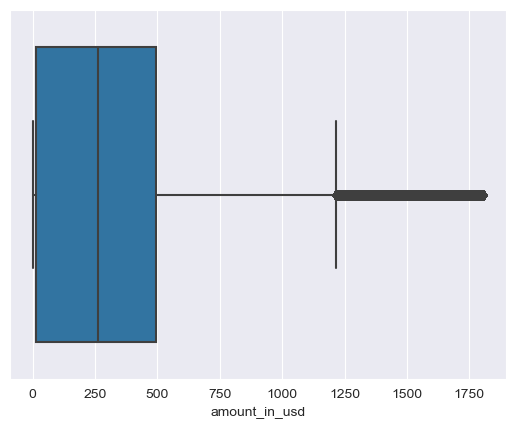

In [53]:
# Boxplot of 'amount_in_usd' column after replacing the outliers with median value.
sns.boxplot(x='amount_in_usd',data=df)
plt.show()

2. Label encoding or One hot Encoding on all the categorical columns 

In [54]:
# Appending 'object' datatype columns to the list named categorical
categorical = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)

In [55]:
# Label encoding the categorical columns
le = LabelEncoder()

for col in categorical:
    df[col] = le.fit_transform(df[col])

3. Log Transformations on continuous columns 

In [56]:
# Log transformation on continuous column i.e 'ORDER_AMOUNT' and 'amount_in_usd'
df['ORDER_AMOUNT']= np.log1p(df['ORDER_AMOUNT'])
df['amount_in_usd'] = np.log1p(df['amount_in_usd'])

4. Try to extract new features by grouping existing columns

In [57]:
# Here I grouped the columns: 'ORDER_AMOUNT','RELEASED_CREDIT_VALUE','CUSTOMER_NUMBER','amount_in_usd'
grouped_df = df.groupby('SALES_ORG').agg({
    'ORDER_AMOUNT': ['mean'],
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'amount_in_usd': ['max']
}).reset_index()

grouped_df.columns = ['SALES_ORG', 'avg_order_amount', 'total_credit_value', 'unique_customers', 'max_amount_usd']

grouped_df

SALES_ORG  avg_order_amount  total_credit_value  unique_customers  \
0          2100          4.495421              609429               141   
1          2101          4.764598              723167               129   
2          2102          4.760109              594668               116   
3          2103          4.693573              667986               124   
4          2104          4.564189              806552               137   
...         ...               ...                 ...               ...   
2406       4506          4.887688              613023               143   
2407       4507          4.784492              620833               122   
2408       4508          4.789962              775251               139   
2409       4509          4.757516              487248               146   
2410       4510          4.886547              634880               138   

      max_amount_usd  
0           7.472131  
1           7.457682  
2           7.497096  
3           7.494677  
4           7.496750  
...              ...  
2406        7.498943  
2407        7.475906  
2408        7.493813  
2409        7.486585  
2410        7.479977  

[2411 rows x 5 columns]

In [58]:
# Modifying our dataframe to remove 'ORDER_AMOUNT' feature because it is same as 'amount_in_usd'
new_df = df.copy()
column_to_exclude = ['ORDER_AMOUNT']
new_df = new_df.drop(column_to_exclude, axis=1)

5. Create a heatmap to find correlation between the columns

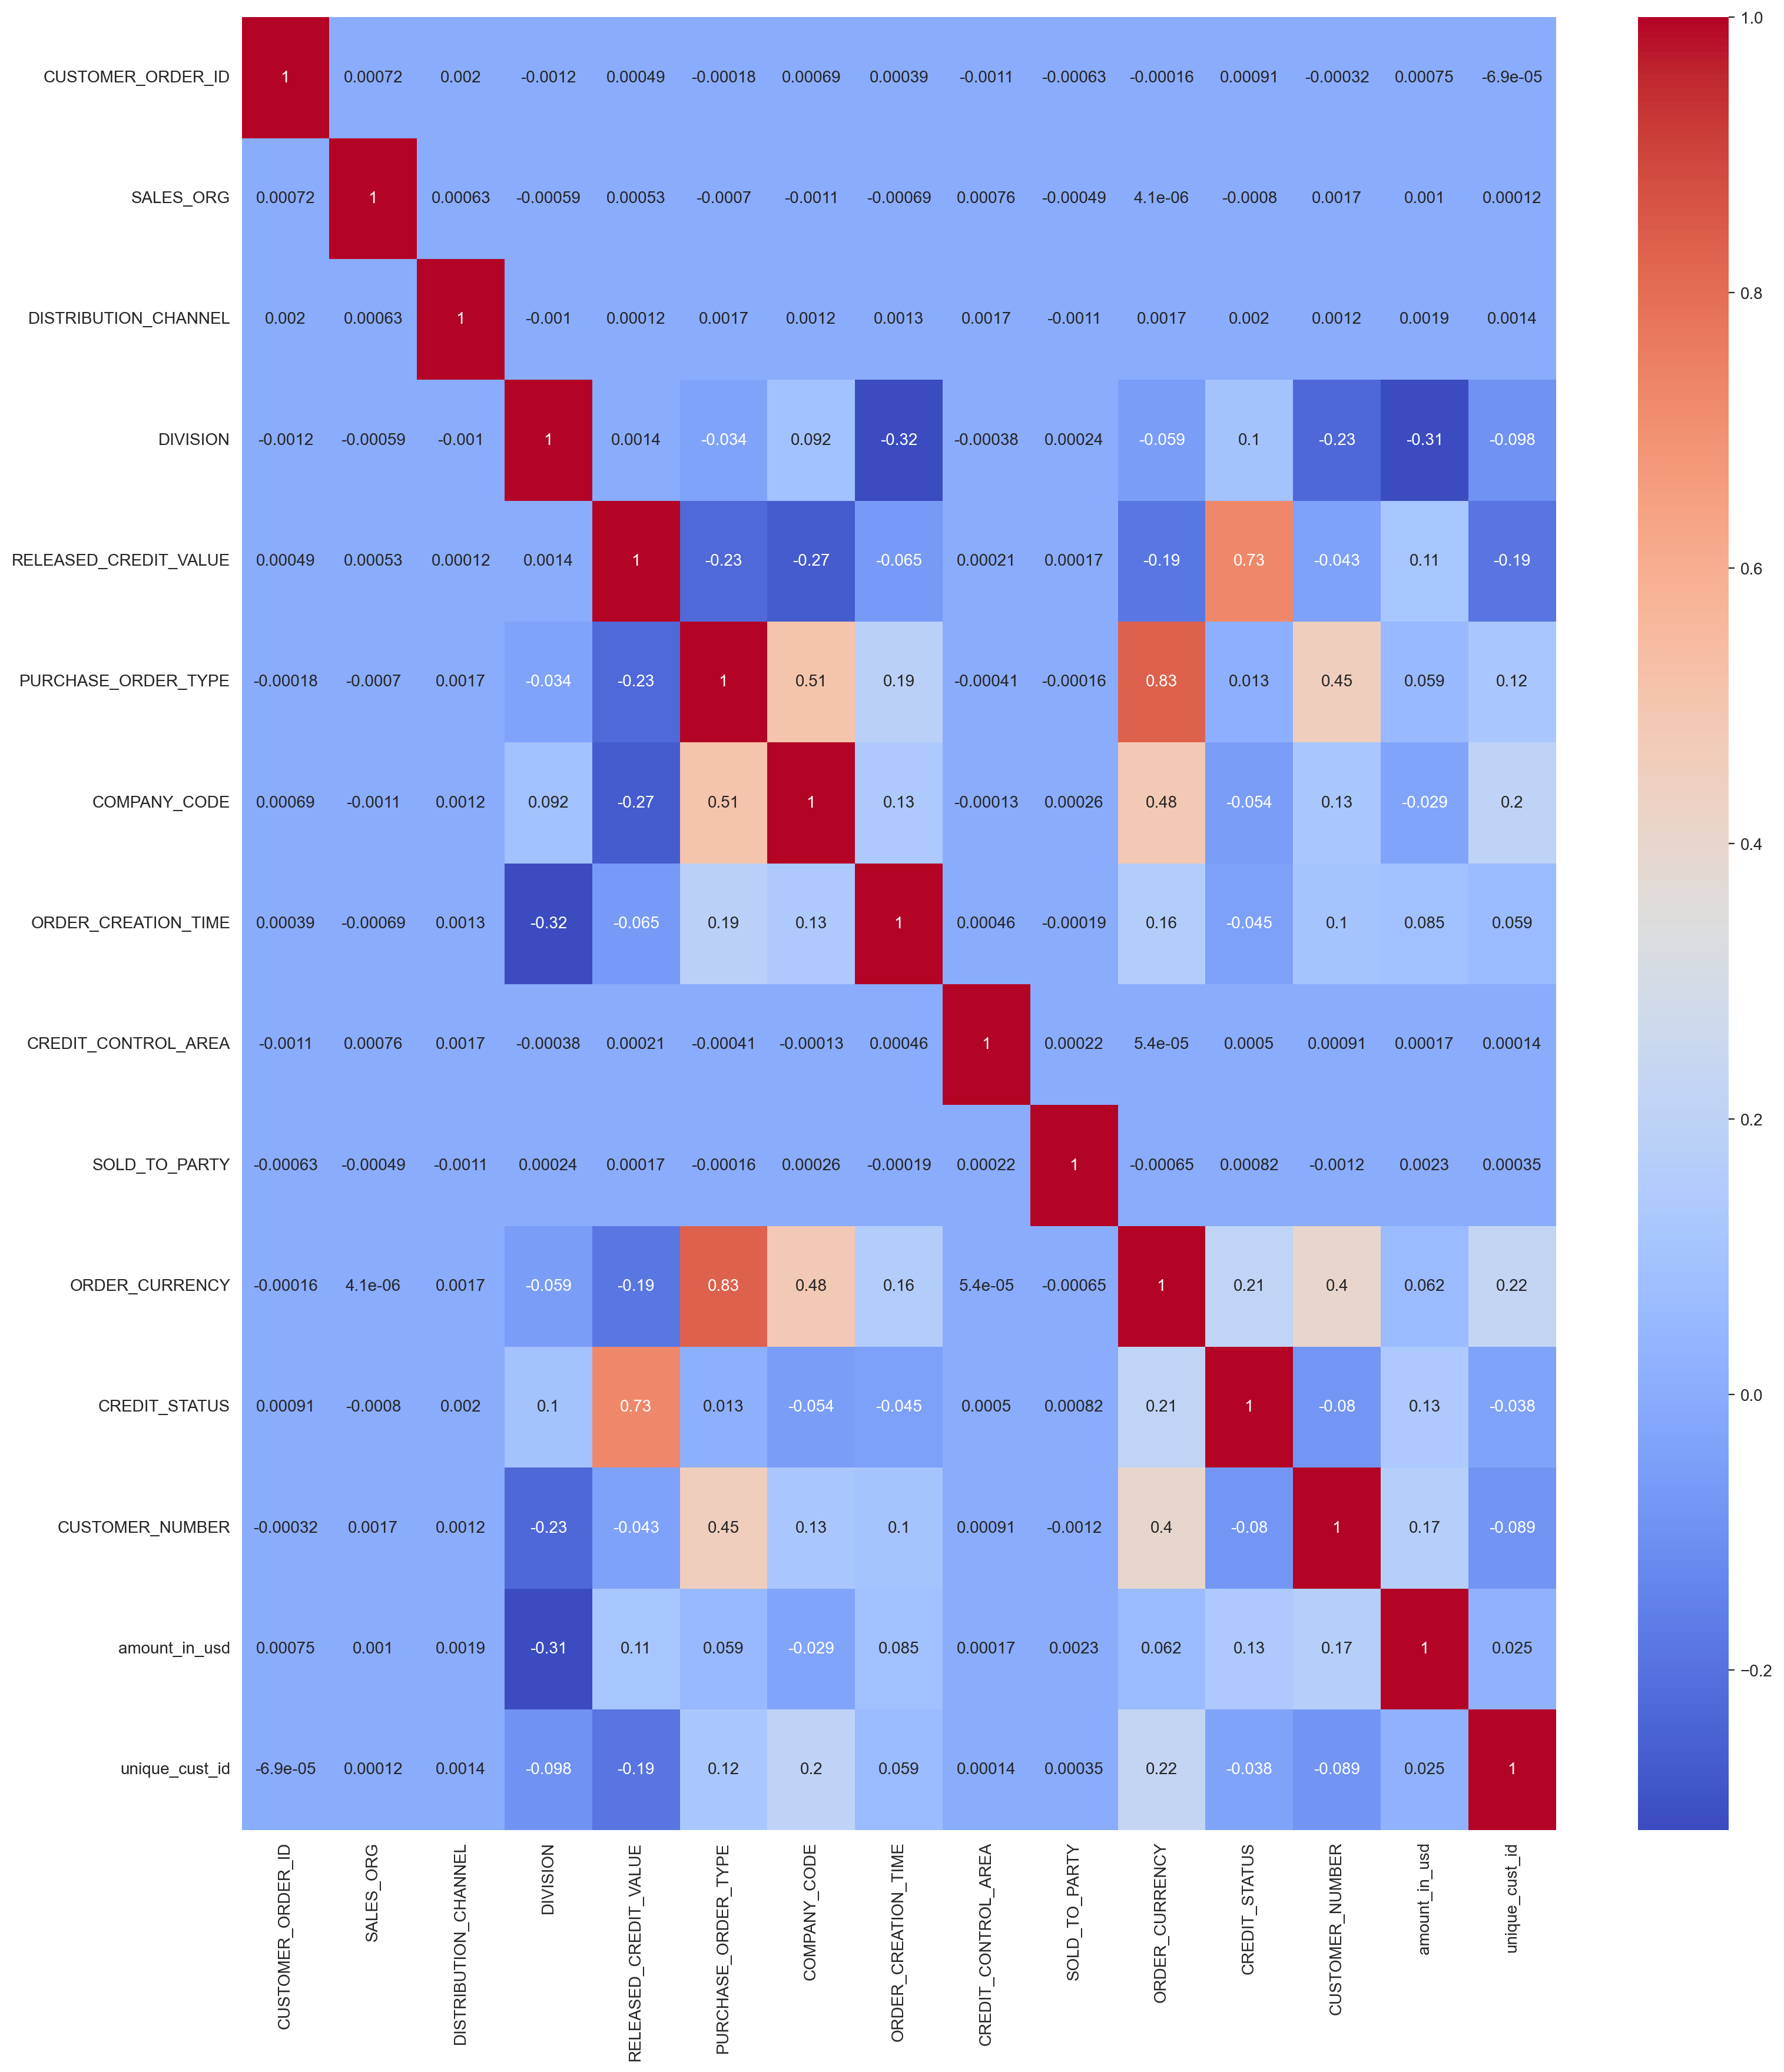

In [59]:
plt.figure(figsize=(18,20), dpi=200)
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.show()

6. Try to identify important or relevant columns for feature extraction

In [60]:
# Here I take a threshold of 0.5, above which we will take the features as relevant.
threshold = 0.5

correlation_matrix = new_df.corr().abs()
high_corr_var = np.where(correlation_matrix >= threshold)
high_corr_var = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print("Relevant columns for feature extraction are:\n", high_corr_var)

Relevant columns for feature extraction are:
 [('RELEASED_CREDIT_VALUE', 'CREDIT_STATUS'), ('PURCHASE_ORDER_TYPE', 'COMPANY_CODE'), ('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY')]


# Milestone 4: ML Models and Evaluations

In [61]:
import sklearn
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

1. Modify the dataset to pass into any type of machine learning models.

In [62]:
# Renaming the amount_in_usd feature to target
df.rename(columns = {'amount_in_usd': 'target'}, inplace = True)

In [72]:
# Here first, I sort the features according to the ORDER_CREATION_DATE since it is a datetime data. Then i take the target feature as y and other relevant features as X the I split the data into train,validation and test set. 60% train data, 20% validation data, 20% test data
df.sort_values('ORDER_CREATION_DATE', inplace=True)

X = df.drop(columns = ['target','ORDER_CREATION_DATE','REQUESTED_DELIVERY_DATE','CUSTOMER_ORDER_ID','ORDER_CREATION_TIME','CREDIT_CONTROL_AREA','SOLD_TO_PARTY','ORDER_AMOUNT','CUSTOMER_NUMBER','CUSTOMER_ORDER_ID','SALES_ORG','DISTRIBUTION_CHANNEL','DIVISION'],axis=1)
y = df['target']

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size = 0.4, shuffle=False)

X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size = 0.5, shuffle=False)

# Scaling the data for better performance of model
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

2. Try different machine learning models like -
* Linear Regression
* Support Vector Machine
* Decision Tree
* Random Forest
* AdaBoost
* Xgboost etc.

3. Perform Regression model evaluations like MSE, RMSE, R-Square etc.

In [73]:
# Creating list for name of the algorithm, MSE,RMSE and R^2
MSE_Score = []
RMSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [74]:
# linear regression implementation
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [75]:
# Evaluating MSE,RMSE,R-square for Linear Regression.
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)

MSE_Score.append(mse)
RMSE_Score.append(rmse)
R2_Score.append(r2_score(y_test, predicted))

In [76]:
for i in Algorithm, MSE_Score, RMSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[3.490089927960426],[1.868178237738687],[0.015367976830851227],

In [ ]:
# SVR implementation               ---> It is taking very long time

from sklearn.svm import SVR

Algorithm.append('SVR')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [ ]:
# Evaluating MSE,RMSE,R-square for SVR.
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)

MSE_Score.append(mse)
RMSE_Score.append(rmse)
R2_Score.append(r2_score(y_test, predicted))

In [ ]:
for i in Algorithm, MSE_Score, RMSE_Score, R2_Score:
    print(i,end=',')

In [77]:
# Decision Tree implementation
from sklearn.tree import DecisionTreeRegressor

Algorithm.append('DecisionTreeRegressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [113]:
# Evaluating MSE,RMSE,R-square for Decision Tree.
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)

MSE_Score.append(mse)
RMSE_Score.append(rmse)
R2_Score.append(r2_score(y_test, predicted))

In [79]:
for i in Algorithm, MSE_Score, RMSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'DecisionTreeRegressor'],[3.490089927960426, 1.6994487654023227],[1.868178237738687, 1.3036290750832165],[0.015367976830851227, 0.5205476905495443],

In [80]:
# Random Forest implemenatation
from sklearn.ensemble import RandomForestRegressor

Algorithm.append('RandomForestRegressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [81]:
# Evaluating MSE,RMSE,R-square for Random Forest
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)

MSE_Score.append(mse)
RMSE_Score.append(rmse)
R2_Score.append(r2_score(y_test, predicted))

In [82]:
for i in Algorithm, MSE_Score, RMSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor'],[3.490089927960426, 1.6994487654023227, 1.4772143934176318],[1.868178237738687, 1.3036290750832165, 1.215407089586708],[0.015367976830851227, 0.5205476905495443, 0.5832449516006046],

In [83]:
# AdaBoost implementation
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

Algorithm.append('AdaBoostRegressor')
regressor = AdaBoostRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [84]:
# Evaluating MSE,RMSE,R-square for AdaBoost.
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)

MSE_Score.append(mse)
RMSE_Score.append(rmse)
R2_Score.append(r2_score(y_test, predicted))

In [85]:
for i in Algorithm, MSE_Score, RMSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor'],[3.490089927960426, 1.6994487654023227, 1.4772143934176318, 2.885664178443178],[1.868178237738687, 1.3036290750832165, 1.215407089586708, 1.698724279700263],[0.015367976830851227, 0.5205476905495443, 0.5832449516006046, 0.18588992924096848],

In [86]:
# XGBoost implementation
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [87]:
# Evaluating MSE,RMSE,R-square for XGBoost.
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)

MSE_Score.append(mse)
RMSE_Score.append(rmse)
R2_Score.append(r2_score(y_test, predicted))

In [88]:
for i in Algorithm, MSE_Score, RMSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'XGB Regressor'],[3.490089927960426, 1.6994487654023227, 1.4772143934176318, 2.885664178443178, 1.403299412772493],[1.868178237738687, 1.3036290750832165, 1.215407089586708, 1.698724279700263, 1.1846093924887193],[0.015367976830851227, 0.5205476905495443, 0.5832449516006046, 0.18588992924096848, 0.604098012248719],

4. Compare the accuracies of all the models 

In [89]:
# comparing all the algorithms by creating a dataframe
comp_df = pd.DataFrame(data = {"Algorithm": Algorithm, "MSE_Score": MSE_Score, "RMSE_Score": RMSE_Score, "R2_Score": R2_Score})
comp_df

Algorithm  MSE_Score  RMSE_Score  R2_Score
0       LinearRegression   3.490090    1.868178  0.015368
1  DecisionTreeRegressor   1.699449    1.303629  0.520548
2  RandomForestRegressor   1.477214    1.215407  0.583245
3      AdaBoostRegressor   2.885664    1.698724  0.185890
4          XGB Regressor   1.403299    1.184609  0.604098

5. Select the best possible model

In [90]:
# choosing the best model i.e XGBoost
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

In [91]:
# Calculate the Mean Square Error for test dataset
mean_squared_error(y_test,predictedfinal,squared=False)

1.1846093924887193

In [92]:
# Calculate the mean Square Error for validation dataset
mean_squared_error(y_val, predict_testfinal, squared=False)

1.2139465637422935

In [93]:
# Calculate the R2 score for test
r2_score(y_test, predictedfinal)

0.604098012248719

In [94]:
# Calculate the R2 score for Validation
r2_score(y_val, predict_testfinal)

0.6889712820301884

In [95]:
# Calculate the Accuracy for train Dataset
regressor.score(X_train, y_train)

0.7740533063925455

In [96]:
# Calculate the accuracy for validation
regressor.score(X_val, y_val)

0.6889712820301884

In [97]:
# Calculate the accuracy for test
regressor.score(X_test, y_test)

0.604098012248719

6. Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms

In [106]:
# Hyperparameter tuning for the best model i.e XGBoost using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
}

grid_search = GridSearchCV(estimator=regressorfinal, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [107]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [108]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [109]:
# Best parameters for XGBoost
best_params

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

In [120]:
# Making predictions using the best model i.e XGBoost
y_pred = regressorfinal.predict(X_test)

7. Come up with the best possible model accuracy.

In [121]:
# # Calculating MSE for XGBoost after Hyperparameter tuning
mean_squared_error(y_test,y_pred)

1.403299412772493

In [124]:
# Calculating R-square for XGBoost after Hyperparameter tuning
r2_score(y_test, y_pred)

0.604098012248719

In [136]:
#Since for better predicting we tranform the "amount_in_usd" to logarithmic form now for the better understanding for the client we need to reverse it. The log transformation is the inverse of the exponential function, applying the exponential function to the log-transformed values will reverse the transformation and restore the original values.

df['amount_in_usd'] = np.exp(df['amount_in_usd'])